In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.datasets               import cifar100
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image             import imread


In [6]:
###########################################################################################################
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
danhsach = ['HoaCuc','ThuocDuoc','MatTroi','VanTho']
dir_train = '/content/drive/MyDrive/Hoa/train' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape)
print(y_train.shape)


(41, 150, 150, 3)
(41, 4)


In [7]:
model=Sequential()
# Block 1/3
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3))) # 32 lần sử dụng bộ lọc, bộ lọc có kích thước là 3x3  
# khai báo bộ lọc kernel và padding là same nghĩa là ảnh trước khi lọc và sau khi lọc phải cùng kích thước
model.add(MaxPooling2D((2, 2)))
##################################################
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Dense là full-connected, nối đầy đủ tế bào lại vs nhau
model.add(Dense(4, activation='sigmoid'))


In [8]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 10)


Epoch 1/10
2/2 [==============================] - 2s 243ms/step - loss: 0.8744 - accuracy: 0.2195
Epoch 2/10
2/2 [==============================] - 1s 239ms/step - loss: 2.5162 - accuracy: 0.3171
Epoch 3/10
2/2 [==============================] - 1s 220ms/step - loss: 1.2115 - accuracy: 0.4146
Epoch 4/10
2/2 [==============================] - 1s 226ms/step - loss: 0.6496 - accuracy: 0.3902
Epoch 5/10
2/2 [==============================] - 1s 232ms/step - loss: 0.3867 - accuracy: 0.7805
Epoch 6/10
2/2 [==============================] - 1s 226ms/step - loss: 0.2471 - accuracy: 0.7805
Epoch 7/10
2/2 [==============================] - 1s 228ms/step - loss: 0.2674 - accuracy: 0.7561
Epoch 8/10
2/2 [==============================] - 1s 230ms/step - loss: 0.2277 - accuracy: 0.7805
Epoch 9/10
2/2 [==============================] - 1s 220ms/step - loss: 0.1874 - accuracy: 0.9512
Epoch 10/10
2/2 [==============================] - 1s 223ms/step - loss: 0.1549 - accuracy: 1.0000


In [9]:
model.save('/content/drive/MyDrive/Hoa/Hoa.h5')

Giá trị dự đoán: 0
Hoa Cuc


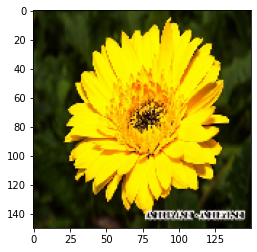

In [21]:
pic = image.load_img('/content/hoacuc1.jpg', target_size=(150,150))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Hoa Cuc")
if np.argmax(model.predict(pic)) == 1:
   print("thược dược")
if np.argmax(model.predict(pic)) == 2:
   print("mặt trời")
if np.argmax(model.predict(pic)) == 3:
   print("Vạn thọ")
